In [20]:
import pandas as pd

import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure

import seaborn as sns # visualization tool

from pandas.plotting import scatter_matrix

In [21]:

country_happiness_df = pd.read_csv('./combined_happiness_weather.csv')
country_happiness_df.head()


,year,country,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,latitude,longitude,tavg,tmin,tmax,wdir,wspd,pres
0,2018,Albania,5.004,9.518,0.684,68.7,0.824,0.009,0.899,0.713,0.319,41.327546,19.818698,16.779178,10.745753,24.042466,186.813218,7.531579,1013.884066
1,2018,Algeria,5.043,9.348,0.799,65.9,0.583,-0.146,0.759,0.591,0.293,36.752887,3.042048,19.209589,16.152603,23.469832,191.703349,10.420448,1016.630247
2,2018,Argentina,5.793,10.032,0.900,68.8,0.846,-0.211,0.855,0.820,0.321,-34.603684,-58.381559,18.050137,14.607671,22.150562,145.181159,14.203179,1015.566549
3,2018,Austria,7.396,10.928,0.912,73.0,0.904,0.053,0.523,0.752,0.226,48.208174,16.373819,13.716712,10.320822,17.797260,217.704871,12.298352,1016.432754
4,2018,Azerbaijan,5.168,9.562,0.781,65.5,0.772,-0.232,0.561,0.593,0.191,40.409262,49.867092,15.596685,11.922928,19.369337,234.056106,18.971271,1017.002536


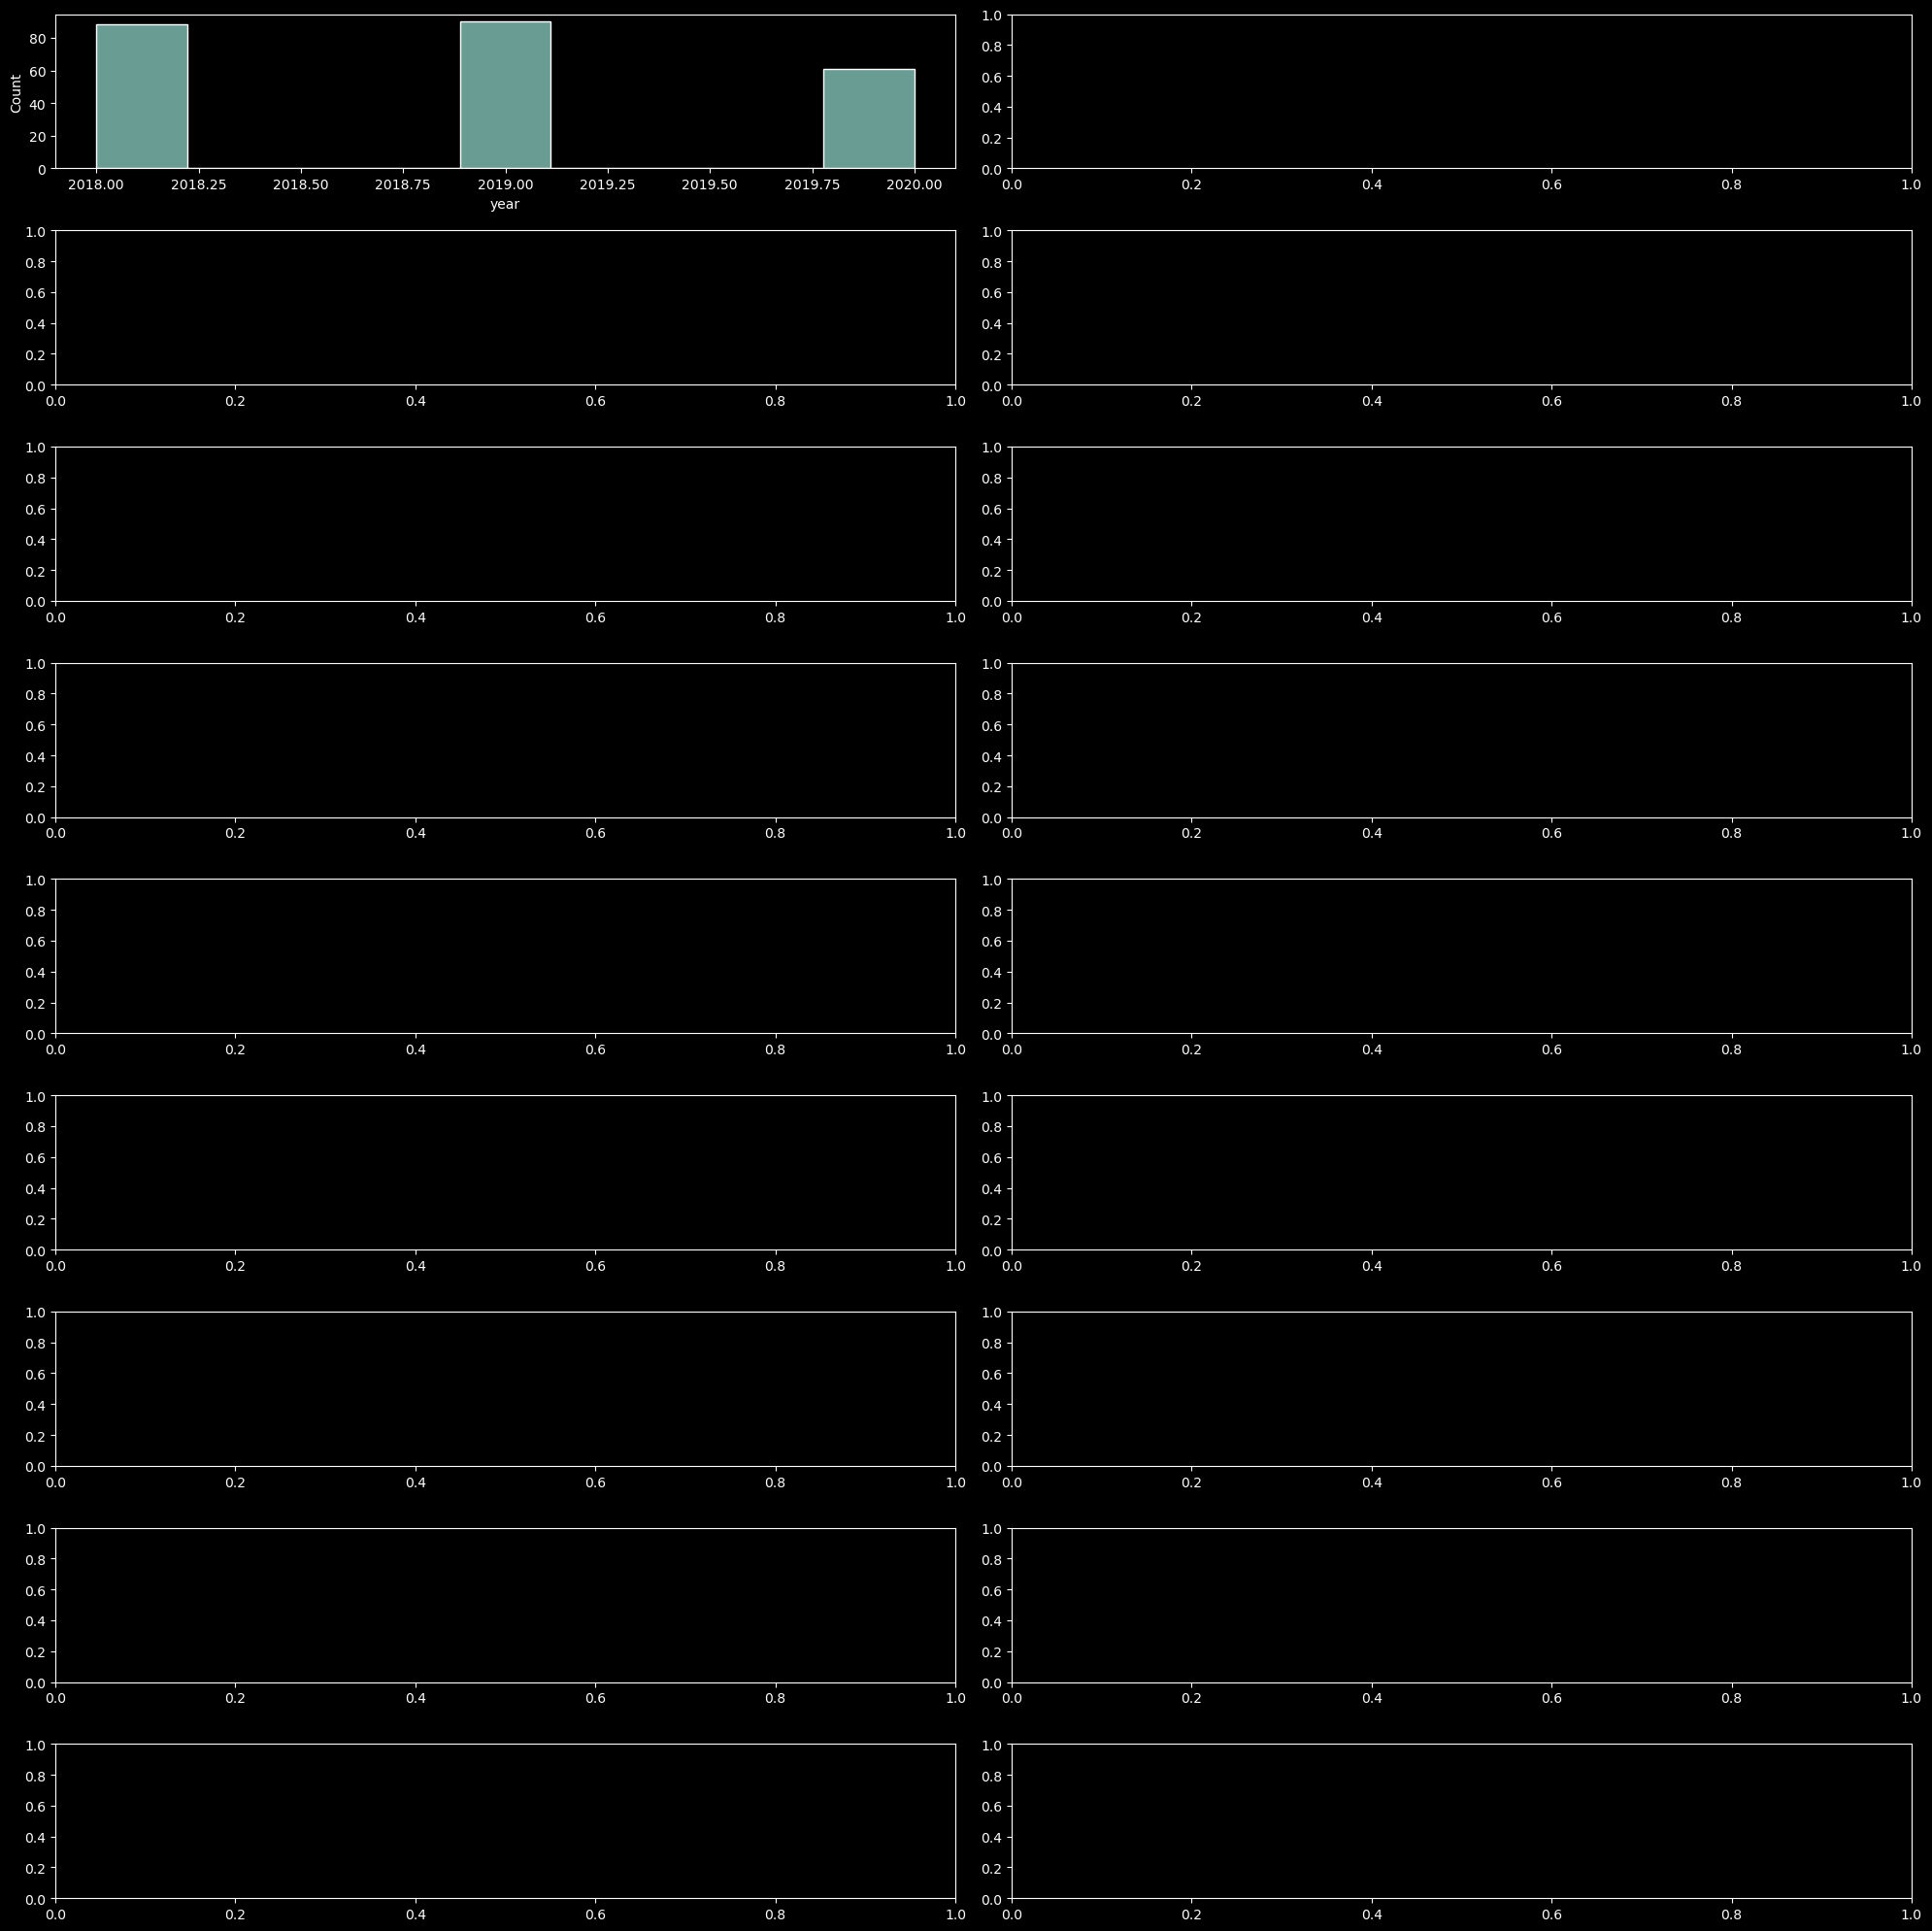

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

IndexError: index 9 is out of bounds for axis 0 with size 9

In [27]:
num_rows=len(country_happiness_df.columns)*2//4
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20)) # 2 columns per#df is your dataframe
  
#Create a histplot for each column in the dataframe:
for i, col in enumerate(country_happiness_df.columns):
    sns.histplot(country_happiness_df[col], ax=axes[i//2, i%2])
    plt.tight_layout()
    plt.show()

    


In [3]:
#view column headers
country_happiness_df.columns
nRow, nCol = country_happiness_df.shape
print(f'There are {nRow} and {nCol} columns')

There are 239 and 19 columns


In [5]:
country_happiness_df.head(5)
country_happiness_df.tail(5)

,year,country,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,latitude,longitude,tavg,tmin,tmax,wdir,wspd,pres
234,2020,United Arab Emirates,6.458,11.053,0.827,67.5,0.942,0.060,0.000,0.752,0.298,24.299174,54.697277,28.674317,22.983607,35.157924,179.601093,13.695082,1008.188798
235,2020,United Kingdom,6.798,10.626,0.929,72.7,0.885,0.203,0.490,0.758,0.225,51.507351,-0.127758,10.705738,7.332877,14.204372,197.597260,15.518630,1014.574521
236,2020,United States,7.028,11.001,0.937,68.1,0.850,0.034,0.678,0.787,0.295,38.907192,-77.036871,15.277049,10.944262,20.051913,189.400000,13.534426,1017.802192
237,2020,Uruguay,6.310,9.937,0.921,69.2,0.908,-0.084,0.491,0.807,0.265,-34.901113,-56.164531,16.773224,12.663934,21.106011,138.573770,11.992623,1015.448087
238,2020,Venezuela,4.574,0.000,0.805,66.9,0.612,0.000,0.811,0.722,0.396,10.480594,-66.903606,26.965847,23.703768,31.126377,80.041056,8.015160,1012.686804


In [6]:
def plotPerColumnDistribution(country_happiness_df, nGraphShown, nGraphPerRow):
    nunique = country_happiness_df.nunique()
    country_happiness_df = country_happiness_df[[col for col in country_happiness_df if nunique[col] > 1 and nunique[col] < 50]] #For Displaying Purposes, pick columns with less than 50 unique values
    nRow, nCol = country_happiness_df.shape

    print(f'There are {nRow} rows and {nCol} columns')
    columnNames = list(country_happiness_df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    columnNames = list(country_happiness_df)
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k') #Setting the size of the graph
    
    print(f'There are {nGraphRow} graph rows and {nGraphPerRow} graphs per row')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i+1)
        column_df = country_happiness_df.columns[i]
        if (not np.issubdtype(type(country_happiness_df[column_df].iloc[0]), np.number)):
            valueCounts = country_happiness_df[column_df].value_counts()
            valueCounts.plot.bar()
        else:
            plt.hist(country_happiness_df[column_df], bins = 100)
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
        plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = country_happiness_df.dataframe
    country_happiness_df = country_happiness_df.dropna('columns') # drop columns with NaN
    country_happiness_df = country_happiness_df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if country_happiness_df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({country_happiness_df.shape[1]}) is less than 2')
        return
    corr = country_happiness_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show() #showing the correlation matrix

In [12]:
#Scatter and density plots
def plotScatterMatrix(country_happiness_df,plotSize, textSize):
    country_happiness_df = country_happiness_df.select_dtypes(include =[np.number]) # keep only numerical columns
    #Remove rows and columns that would lead to df being singular
    country_happiness_df = country_happiness_df.dropna('columns')
    country_happiness_df= country_happiness_df[[col for col in country_happiness_df if country_happiness_df[col].nunique() > 1]] # keep columns where there are more than 1 unique values   
    columnNames = list(country_happiness_df)
    if len(columnNames) >10: #reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    country_happiness_df = country_happiness_df[columnNames]
    ax = pd.plotting.scatter_matrix(country_happiness_df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = country_happiness_df.corr().values
  
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate("Correlation Coefficient: %.3f" %corrs[i,j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show

In [8]:
nRowsRead = 1000 # specify 'None' if want to read whole file
country_happiness_df1_path = ('./combined_happiness_weather.csv')
country_happiness_df1 = pd.read_csv(country_happiness_df1_path, delimiter=',', nrows = nRowsRead)
nRow, nCol = country_happiness_df1.shape
print (f'There are {nRow} rows and {nCol} columns')

There are 239 rows and 19 columns


In [9]:
country_happiness_df1.head(5)

,year,country,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,latitude,longitude,tavg,tmin,tmax,wdir,wspd,pres
0,2018,Albania,5.004,9.518,0.684,68.7,0.824,0.009,0.899,0.713,0.319,41.327546,19.818698,16.779178,10.745753,24.042466,186.813218,7.531579,1013.884066
1,2018,Algeria,5.043,9.348,0.799,65.9,0.583,-0.146,0.759,0.591,0.293,36.752887,3.042048,19.209589,16.152603,23.469832,191.703349,10.420448,1016.630247
2,2018,Argentina,5.793,10.032,0.900,68.8,0.846,-0.211,0.855,0.820,0.321,-34.603684,-58.381559,18.050137,14.607671,22.150562,145.181159,14.203179,1015.566549
3,2018,Austria,7.396,10.928,0.912,73.0,0.904,0.053,0.523,0.752,0.226,48.208174,16.373819,13.716712,10.320822,17.797260,217.704871,12.298352,1016.432754
4,2018,Azerbaijan,5.168,9.562,0.781,65.5,0.772,-0.232,0.561,0.593,0.191,40.409262,49.867092,15.596685,11.922928,19.369337,234.056106,18.971271,1017.002536


There are 239 rows and 1 columns
There are 1 graph rows and 5 graphs per row


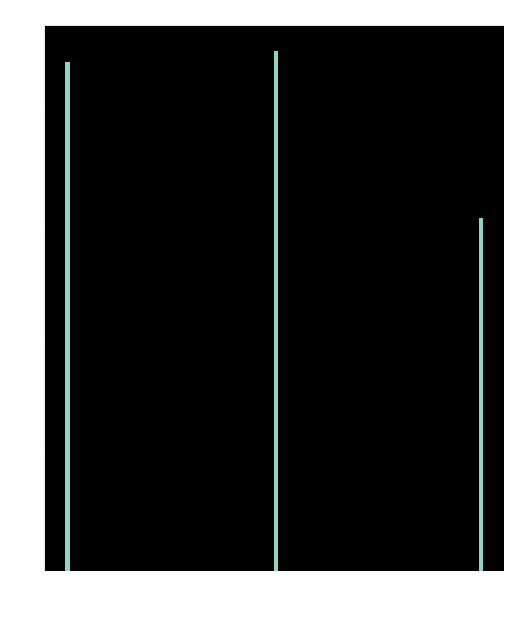

In [10]:
plotPerColumnDistribution(country_happiness_df1, 10, 5)

In [14]:
plotCorrelationMatrix(country_happiness_df1, 8)

NameError: name 'plotCorrelationMatrix' is not defined

C:\Users\tscot\AppData\Local\Temp\ipykernel_25292\2252198155.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  country_happiness_df = country_happiness_df.dropna('columns')


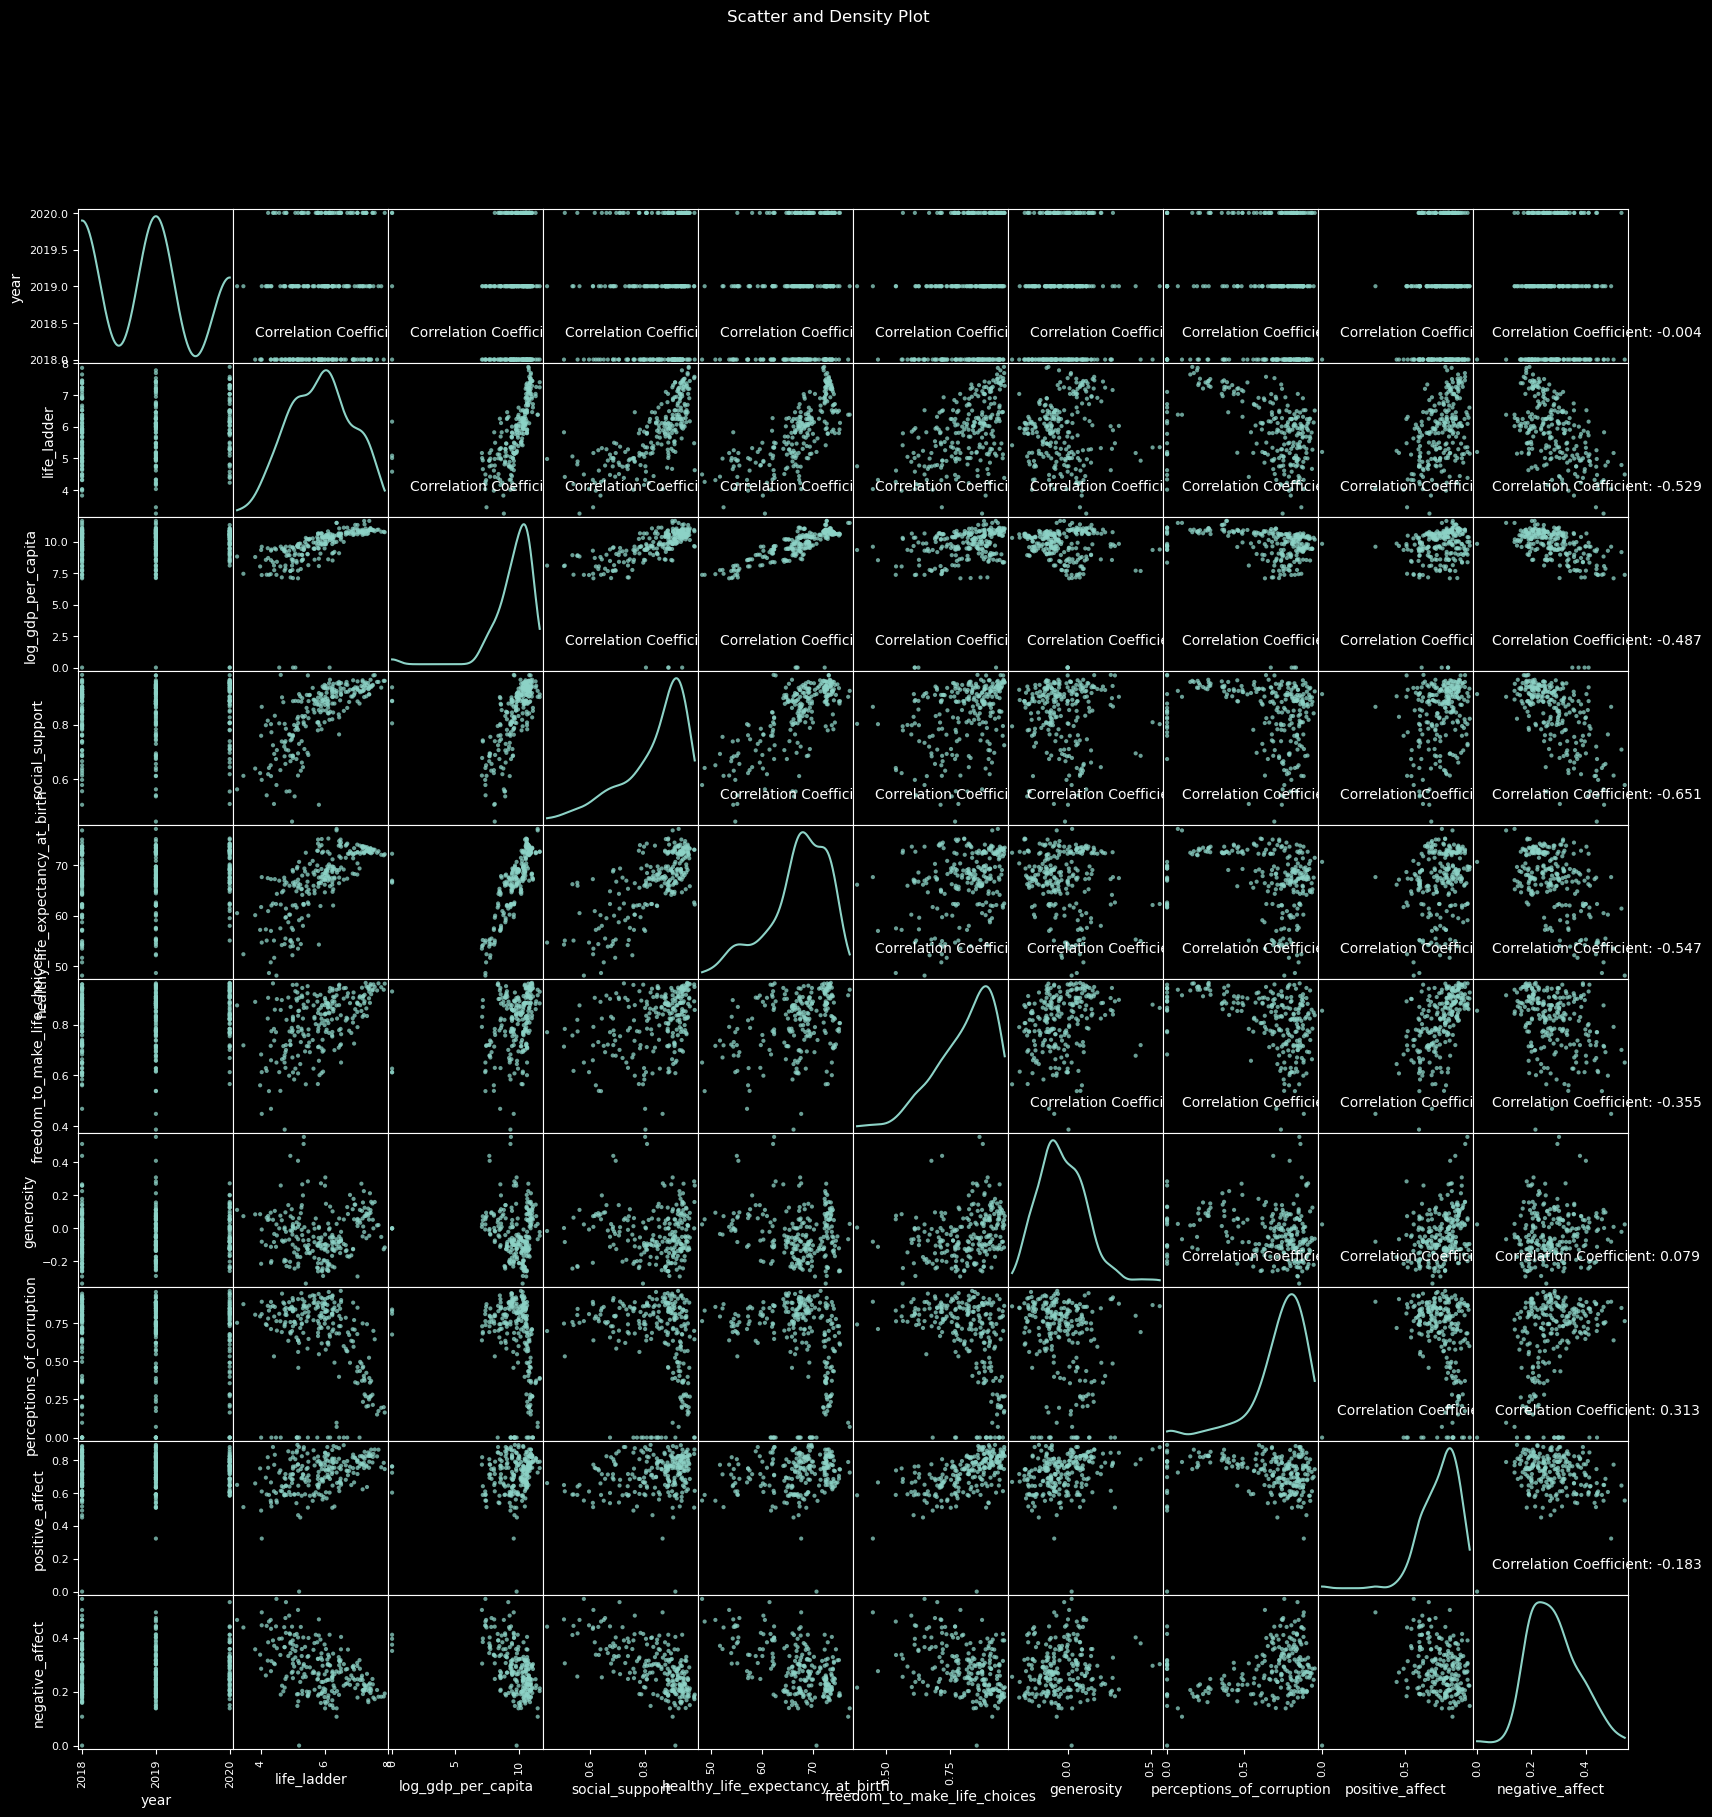

In [13]:
plotScatterMatrix(country_happiness_df1, 20, 10)